The goal point will be (10, 10) and the goal orientation will be 2

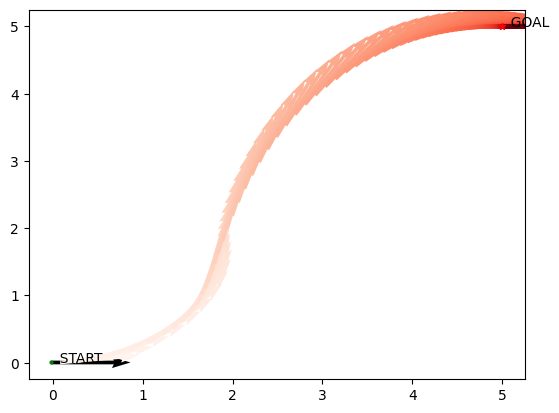

In [12]:
import numpy as np
import matplotlib.pyplot as plt

scale = 1

desired_arr = np.zeros((1, 3))
state_arr = np.zeros((2, 3))
diff_arr = np.zeros((1, 3))

# desired_arr[0] = [10., 10., 0.]   
state_arr[1] = [-0.01897712, 0.00382164, 0.]   # The initial state
desired_arr[0] = [5., 5., 0.]                  # The goal
velocity = 0.0
omega = 0.0
sampling_freq = 1  #Hz

# constants (success)
# k1 = 16e-4      # speed
# k2 = 8e-3       # trajectory

# k1 = 80e-4      # speed
# k2 = 5*k1       # trajectory

k1 = 1000e-4      # speed
k2 = 5*k1      # trajectory

# plot the desired state
plt.quiver(desired_arr[0][0], desired_arr[0][1], np.cos(desired_arr[0][2]), np.sin(desired_arr[0][2]), scale=scale, units='xy')
plt.plot(desired_arr[0][0], desired_arr[0][1], marker="*", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.text(desired_arr[0][0], desired_arr[0][1], '  GOAL')

numIterations = 100
## Here starts the loop
for iteration in range(numIterations):
    # calculate the difference
    for j in range(3):
        diff_arr[0][j] = (state_arr[1][j] - desired_arr[0][j])
    
    z1 = diff_arr[0][2]
    z2 = diff_arr[0][0]*np.cos(diff_arr[0][2]) + diff_arr[0][1]*np.sin(diff_arr[0][2])
    z3 = diff_arr[0][0]*np.sin(diff_arr[0][2]) - diff_arr[0][1]*np.cos(diff_arr[0][2])
    
    x1 = z1
    x2 = z2
    x3 = -2*z3+z1*z2
    
    u1 = -k1*x1 + ((k2*x3)/(x1**2+x2**2))*x2
    u2 = -k1*x2 - ((k2*x3)/(x1**2+x2**2))*x1
    
    # omega = u1
    # get start from zero velocity
    slow_region = 50
    if iteration <= slow_region:
        velocity = ((iteration+1)/(slow_region*1.1))*(u2 + z3*u1)
        omega = ((iteration+0.1*slow_region)/(slow_region*1.1))*u1
    else:
        velocity = 1*(u2 + z3*u1)   # the linear velocoty of the robot
        omega = 1*u1
    # plot the starting point
    if iteration == 0:
        plt.quiver(state_arr[1][0], state_arr[1][1], np.cos(state_arr[1][2]), np.sin(state_arr[1][2]), scale=scale, units='xy')
        plt.plot(state_arr[1][0], state_arr[1][1], marker="o", markersize=2, markeredgecolor="green", markerfacecolor="green")
        plt.text(state_arr[1][0], state_arr[1][1], '  START')

    if velocity < 0:
        state_arr[1][2] += np.pi/2.    # if the velocity is negative, turn around
        continue

    # print velocity
    # if iteration % 1 == 0:
    #     print("iterations: ", iteration, "velocity: ", velocity, "omega: ", omega)
    
    # update the information of the next state #
    state_arr[0][0] = state_arr[1][0] + velocity*np.cos(state_arr[1][2]) *(1.0/sampling_freq)
    state_arr[0][1] = state_arr[1][1] + velocity*np.sin(state_arr[1][2]) *(1.0/sampling_freq)
    state_arr[0][2] = state_arr[1][2] + omega *(1.0/sampling_freq)
    # update the information of the next state #
    
    # plot the current status
    plt.quiver(state_arr[0][0], state_arr[0][1], 1*np.cos(state_arr[0][2]), 1*np.sin(state_arr[0][2]), scale=scale, units='xy', color=plt.cm.Reds((iteration+1)/numIterations))
    
    # clear the old information
    for i in range(3):
        state_arr[1][i] = state_arr[0][i]




**Trying to include the initial velocity**

iterations:  0 velocity:  0.05 omega:  0.09049613534147226
iterations:  1 velocity:  0.052281475396960334 omega:  0.09536708497611607
iterations:  2 velocity:  0.05600892448893706 omega:  0.09775481962350291
iterations:  3 velocity:  0.059887782482131516 omega:  0.0983834177579436
iterations:  4 velocity:  0.06308767475943033 omega:  0.09765342605653606
iterations:  5 velocity:  0.0651439807500363 omega:  0.09575303303371058
iterations:  6 velocity:  0.06589289594786629 omega:  0.09274365119486251
iterations:  7 velocity:  0.06543378926609945 omega:  0.08862163331707587
iterations:  8 velocity:  0.06409841434905833 omega:  0.08336655355217976
iterations:  9 velocity:  0.06240651359854315 omega:  0.07698317007187273
iterations:  10 velocity:  0.06099333566677122 omega:  0.06953854339174027
iterations:  11 velocity:  0.060506456928445244 omega:  0.06119008990018284
iterations:  12 velocity:  0.061486270773249044 omega:  0.05219627771855678
iterations:  13 velocity:  0.06426071623967786 o

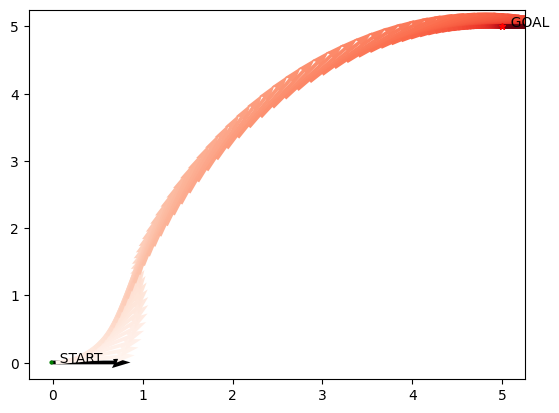

In [21]:
import numpy as np
import matplotlib.pyplot as plt

scale = 1

desired_arr = np.zeros((1, 3))
state_arr = np.zeros((2, 3))
diff_arr = np.zeros((1, 3))

# desired_arr[0] = [10., 10., 0.]   
state_arr[1] = [-0.01897712, 0.00382164, 0.]   # The initial state
desired_arr[0] = [5., 5., 0.]                  # The goal
initial_velocity = 0.05
velocity = initial_velocity
omega = 0.0
sampling_freq = 1  #Hz

# constants (success)
k1 = 1000e-4      # speed
k2 = 5*k1      # trajectory

# plot the desired state
plt.quiver(desired_arr[0][0], desired_arr[0][1], np.cos(desired_arr[0][2]), np.sin(desired_arr[0][2]), scale=scale, units='xy')
plt.plot(desired_arr[0][0], desired_arr[0][1], marker="*", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.text(desired_arr[0][0], desired_arr[0][1], '  GOAL')

numIterations = 100
## Here starts the loop
for iteration in range(numIterations):
    # calculate the difference
    for j in range(3):
        diff_arr[0][j] = (state_arr[1][j] - desired_arr[0][j])
    
    #### controller ####
    z1 = diff_arr[0][2]
    z2 = diff_arr[0][0]*np.cos(diff_arr[0][2]) + diff_arr[0][1]*np.sin(diff_arr[0][2])
    z3 = diff_arr[0][0]*np.sin(diff_arr[0][2]) - diff_arr[0][1]*np.cos(diff_arr[0][2])
    
    x1 = z1
    x2 = z2
    x3 = -2*z3+z1*z2
    
    u1 = -k1*x1 + ((k2*x3)/(x1**2+x2**2))*x2
    u2 = -k1*x2 - ((k2*x3)/(x1**2+x2**2))*x1
    
    # omega = u1
    # get start from initial velocity
    initial_region = 50
    if iteration <= initial_region:
        velocity = (iteration*((iteration+1)/(initial_region*1.1))*(u2 + z3*u1) + (initial_region-iteration)*initial_velocity)/initial_region
        omega = ((iteration+0.1*initial_region)/(initial_region*1.1))*u1
    else:
        velocity = 1*(u2 + z3*u1)   # the linear velocoty of the robot
        omega = 1*u1
    #### controller ####


    # plot the starting point
    if iteration == 0:
        plt.quiver(state_arr[1][0], state_arr[1][1], np.cos(state_arr[1][2]), np.sin(state_arr[1][2]), scale=scale, units='xy')
        plt.plot(state_arr[1][0], state_arr[1][1], marker="o", markersize=2, markeredgecolor="green", markerfacecolor="green")
        plt.text(state_arr[1][0], state_arr[1][1], '  START')

    if velocity < 0:
        state_arr[1][2] += np.pi/2.    # if the velocity is negative, turn around
        continue

    # print velocity
    if iteration % 1 == 0:
        print("iterations: ", iteration, "velocity: ", velocity, "omega: ", omega)
    
    # update the information of the next state #
    state_arr[0][0] = state_arr[1][0] + velocity*np.cos(state_arr[1][2]) *(1.0/sampling_freq)
    state_arr[0][1] = state_arr[1][1] + velocity*np.sin(state_arr[1][2]) *(1.0/sampling_freq)
    state_arr[0][2] = state_arr[1][2] + omega *(1.0/sampling_freq)
    # update the information of the next state #
    
    # plot the current status
    plt.quiver(state_arr[0][0], state_arr[0][1], 1*np.cos(state_arr[0][2]), 1*np.sin(state_arr[0][2]), scale=scale, units='xy', color=plt.cm.Reds((iteration+1)/numIterations))
    
    # clear the old information
    for i in range(3):
        state_arr[1][i] = state_arr[0][i]


